### 1. [チュートリアル](#チュートリアル)

### 2. [CNNの構築でmnistの分類精度向上](#CNN)

### 3. Autoencoder
- 3.1. [Autoencoder の構築とmnist の学習](#Autoencoder)
- 3.2. [入力データと再構成した画像の比較](#比較)
- 3.3. [任意の潜在変数からデコードした画像の表示](#表示)

## チュートリアル

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
# MNIST データを読み込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
# MNIST データを加工する
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train/= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [5]:
# Dense : 第1引数で出力の次元数を指定します。
# 入力の次元数はinput_shapeで指定します(指定しない場合は出力と同じ)
model = Sequential()
model.add(InputLayer(input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

# モデルをコンパイルする
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size,
        epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.5886 - acc: 0.8569 - val_loss: 0.3416 - val_acc: 0.9078
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3301 - acc: 0.9083 - val_loss: 0.2969 - val_acc: 0.9179
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3012 - acc: 0.9161 - val_loss: 0.2867 - val_acc: 0.9210
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2879 - acc: 0.9200 - val_loss: 0.2784 - val_acc: 0.9240
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2799 - acc: 0.9218 - val_loss: 0.2754 - val_acc: 0.9243
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2747 - acc: 0.9239 - val_loss: 0.2716 - val_acc: 0.9253
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0

In [7]:
# 検証
score = model.evaluate(x_test, y_test, verbose = 1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 24us/step

Test loss: 0.27116234516501425
Test accuracy: 0.9283


In [29]:
model.predict(x_test[[0][:]])

array([[8.6324604e-08, 2.3124647e-13, 3.6825050e-08, 7.6128263e-04,
        6.0045942e-08, 9.9434292e-06, 2.0160695e-15, 9.9903619e-01,
        2.3279024e-06, 1.9002358e-04]], dtype=float32)

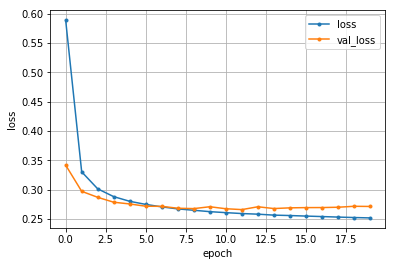

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker = '.', label = 'loss')
plt.plot(range(nb_epoch), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best', fontsize = 10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

In [2]:
# MNIST データを読み込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# MNIST データを加工する
x_train = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train/= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

In [8]:

# Dense : 第1引数で出力の次元数を指定します。
# 入力の次元数はinput_shapeで指定します(指定しない場合は出力と同じ)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# モデルをコンパイルする
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# 学習
epochs = 30
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size,
        epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2386 - acc: 0.9268 - val_loss: 0.0586 - val_acc: 0.9829
Epoch 2/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0861 - acc: 0.9746 - val_loss: 0.0408 - val_acc: 0.9867
Epoch 3/30
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0428 - val_acc: 0.9852
Epoch 4/30
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0560 - acc: 0.9835 - val_loss: 0.0363 - val_acc: 0.9876
Epoch 5/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0529 - acc: 0.9843 - val_loss: 0.0295 - val_acc: 0.9904
Epoch 6/30
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0523 - acc: 0.9849 - val_loss: 0.0334 - val_acc: 0.9899
Epoch 7/30
60000/60000 [==============================] - 106s 2ms/step - loss:

In [10]:
# 検証
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 6s 554us/step
Test loss: 0.04126760577610748
Test accuracy: 0.99


In [29]:
model.predict(x_test[[0][:]])

array([[8.6324604e-08, 2.3124647e-13, 3.6825050e-08, 7.6128263e-04,
        6.0045942e-08, 9.9434292e-06, 2.0160695e-15, 9.9903619e-01,
        2.3279024e-06, 1.9002358e-04]], dtype=float32)

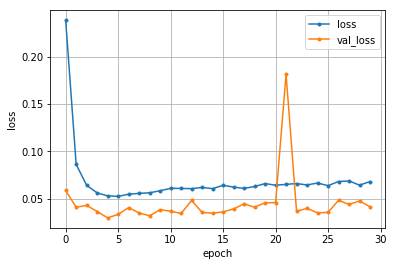

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker = '.', label = 'loss')
plt.plot(range(nb_epoch), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best', fontsize = 10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

epoch=10 のval_loss を見ると
NN: 0.275 に比べ
CNN: 0.03
と大きく改善されている。

#### epoch22に一体何が？

## Autoencoder

In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [13]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train)), np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('x_train.shape: {}'.format(x_train.shape))
print('x_test.shape: {}'.format(x_test.shape))

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)


In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/step - loss: 0.3632 - val_loss: 0.2692
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2600 - val_loss: 0.2471
Epoch 3/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2363 - val_loss: 0.2239
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2166 - val_loss: 0.2070
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2024 - val_loss: 0.1951
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1920 - val_loss: 0.1859
Epoch 7/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1839 - val_loss: 0.1787
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1772 - val_loss: 0.1726
Epoch 9/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1714 - val_loss: 0.1672
Epoch

In [16]:
# encode and decode some digits
# note that we take them from *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print('encoded_imgs.mean(): {}'.format(encoded_imgs.mean()))
print('decoded_imgs.mean(): {}'.format(decoded_imgs.mean()))

encoded_imgs.mean(): 7.67834997177124
decoded_imgs.mean(): 0.1326075792312622


## 比較

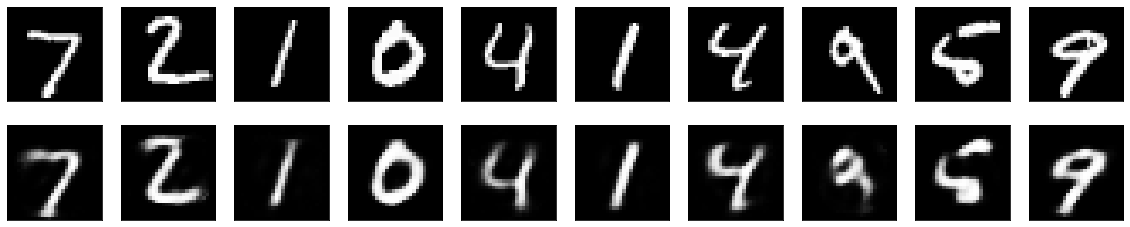

In [36]:
%matplotlib inline
# use Matplotlib(don't ask)
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstrution
    ax = plt.subplot(2, n, i + 1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

画像処理で簡単にぼやけが修正できるであろう程度に復元できている。
８枚目の「9」は少しあやしい・・・？

## 表示

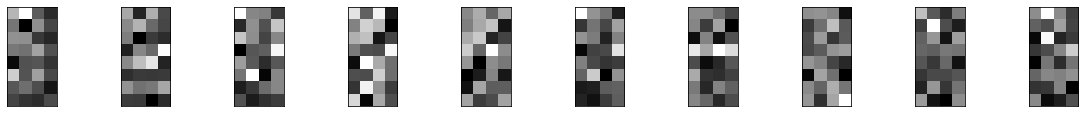

In [40]:
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display latent images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

３枚目と６枚目がともに「１」の画像。なるほど、人が見てわかるくらい確かに似ている。